In [1]:
# Data manipulation, analysis and statistics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud

# Preprocessing for target label into numerical for analytics
from sklearn.preprocessing import LabelEncoder

# Feature extraction for word features into numerical for analytics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Machine Learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# Pipeline to wrap up extraction and training classifier
from sklearn.pipeline import Pipeline

# Classifier evaluation
from sklearn.model_selection import cross_val_score

# Stopwords corpus to be excluded from word features
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))
stops.add("he's")
stops.add("i'm")

# Stemming to reduce each word to its stem
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Utilities
import re
import string
from urllib.parse import unquote_plus

In [2]:
# Import dataset
df = pd.read_excel('News Title.xls', index_col='No')

# Preview dataset
df.head()

,News Title,Category
No,,
1,Google+ rolls out 'Stories' for tricked out ph...,Technology
2,Dov Charney's Redeeming Quality,Business
3,White God adds Un Certain Regard to the Palm Dog,Entertainment
4,"Google shows off Androids for wearables, cars,...",Technology
5,China May new bank loans at 870.8 bln yuan,Business


In [3]:
# Check the distribution of target label (Category)
df['Category'].value_counts()

Entertainment    23961
Business         17707
Technology       16776
Medical           7091
Name: Category, dtype: int64

In [4]:
# Copy the original data into another variable to be processed
processed_df = df.copy()

# Preview processed dataframe
processed_df.head()

,News Title,Category
No,,
1,Google+ rolls out 'Stories' for tricked out ph...,Technology
2,Dov Charney's Redeeming Quality,Business
3,White God adds Un Certain Regard to the Palm Dog,Entertainment
4,"Google shows off Androids for wearables, cars,...",Technology
5,China May new bank loans at 870.8 bln yuan,Business


In [5]:
# Transform categorical label into numerical for analytics
label_encoder = LabelEncoder()
processed_df['num_Category'] = label_encoder.fit_transform(df['Category'])

# All categories which are encoded by label_encoder
label_encoder.classes_

array(['Business', 'Entertainment', 'Medical', 'Technology'], dtype=object)

In [6]:
# Preview transformed category in dataframe
processed_df.head()

,News Title,Category,num_Category
No,,,
1,Google+ rolls out 'Stories' for tricked out ph...,Technology,3
2,Dov Charney's Redeeming Quality,Business,0
3,White God adds Un Certain Regard to the Palm Dog,Entertainment,1
4,"Google shows off Androids for wearables, cars,...",Technology,3
5,China May new bank loans at 870.8 bln yuan,Business,0


In [7]:
# Describe News Title
processed_df['News Title'].describe()

count                                                 65535
unique                                                64981
top       The article requested cannot be found! Please ...
freq                                                     21
Name: News Title, dtype: object

In [8]:
# Get 10 most frequent data based on 'News Title'
processed_df['News Title'].value_counts().head(10)

The article requested cannot be found! Please refresh your browser or go back  ...    21
Posted by Imaduddin                                                                   11
Posted by Shoaib-ur-Rehman Siddiqui                                                   11
Business Highlights                                                                   10
Posted by Parvez Jabri                                                                10
Business Wire                                                                          7
What you need to know before markets open                                              7
(click the phrases to see a list)                                                      7
PR Newswire                                                                            6
Posted by Muhammad Iqbal                                                               6
Name: News Title, dtype: int64

Based on the preview on 10 most frequent data, we can see that it is a lot of 'odd' titles which do not make any sense to categorize it into any of the category semantically.

In [9]:
# Look up the dataset with the most frequent 'News Title'
news_title_mode = processed_df['News Title'].mode()[0]
processed_df[processed_df['News Title'] == news_title_mode]

,News Title,Category,num_Category
No,,,
990,The article requested cannot be found! Please ...,Entertainment,1
4321,The article requested cannot be found! Please ...,Entertainment,1
4426,The article requested cannot be found! Please ...,Entertainment,1
5100,The article requested cannot be found! Please ...,Entertainment,1
5250,The article requested cannot be found! Please ...,Entertainment,1
9012,The article requested cannot be found! Please ...,Entertainment,1
12376,The article requested cannot be found! Please ...,Entertainment,1
13256,The article requested cannot be found! Please ...,Entertainment,1
15280,The article requested cannot be found! Please ...,Entertainment,1


In [10]:
# Remove the data as it will be a noise for building our model
processed_df = processed_df[processed_df['News Title'] != news_title_mode]
processed_df['News Title'].value_counts().head(10)

Posted by Imaduddin                          11
Posted by Shoaib-ur-Rehman Siddiqui          11
Posted by Parvez Jabri                       10
Business Highlights                          10
(click the phrases to see a list)             7
What you need to know before markets open     7
Business Wire                                 7
10 Things to Know for Today                   6
Posted by Muhammad Iqbal                      6
PR Newswire                                   6
Name: News Title, dtype: int64

Back on to the most frequent 'News Title', we can see that there are still several 'title' with similarities and do not correlate to any of the categories. 

In [11]:
# Look up the dataset which have 'News Title' starts with 'Posted by'
processed_df[processed_df['News Title'].str.startswith('Posted')].sort_values(by='News Title')

,News Title,Category,num_Category
No,,,
45334,Posted by Abdul Ahad,Business,0
15057,Posted by Imaduddin,Business,0
29925,Posted by Imaduddin,Business,0
41840,Posted by Imaduddin,Business,0
19464,Posted by Imaduddin,Business,0
18987,Posted by Imaduddin,Business,0
14872,Posted by Imaduddin,Business,0
41446,Posted by Imaduddin,Business,0
56593,Posted by Imaduddin,Business,0


In [12]:
# Remove those non relevant data
processed_df = processed_df[~processed_df['News Title'].str.startswith('Posted by')]

# Preview the remaining duplicate 'News Title' with the frequencies
news_title_value_counts = processed_df['News Title'].value_counts()
duplicate_news_title_counts = news_title_value_counts[news_title_value_counts > 1]
duplicate_news_title_counts

Business Highlights                                                                10
(click the phrases to see a list)                                                   7
What you need to know before markets open                                           7
Business Wire                                                                       7
PR Newswire                                                                         6
10 Things to Know for Today                                                         6
Change text size for the story                                                      5
The Daily Dish                                                                      5
India Morning Call-Global Markets                                                   5
Business briefs                                                                     5
Get the Most Popular Beauty World News Stories in a Weekly Newsletter               4
Perez Recommends                                      

In [13]:
# Expand all the duplicated 'News Title'
duplicated_news_title_df = processed_df[processed_df['News Title'].isin(duplicate_news_title_counts.keys())].sort_values(by='News Title')
duplicated_news_title_df

,News Title,Category,num_Category
No,,,
52578,'22 Jump Street' beats 'Dragon 2' at weekend b...,Entertainment,1
61114,'22 Jump Street' beats 'Dragon 2' at weekend b...,Entertainment,1
40766,'22 Jump Street': The verdict is in,Entertainment,1
31235,'22 Jump Street': The verdict is in,Entertainment,1
24921,'Candy Crush Saga' maker nears IPO that could ...,Business,0
46378,'Candy Crush Saga' maker nears IPO that could ...,Business,0
56684,'Chicken from hell' sheds new light on bird-li...,Technology,3
53278,'Chicken from hell' sheds new light on bird-li...,Technology,3
41554,'Daily Mail' apologizes to George Clooney,Entertainment,1


In [14]:
# Grouping all the duplicated 'News Title' and look up to all the value of the 'Category'
duplicated_news_title_with_category_df = duplicated_news_title_df.groupby('News Title')['Category'].apply(lambda x: x.unique()).reset_index()
duplicated_news_title_with_category_df

,News Title,Category
0,'22 Jump Street' beats 'Dragon 2' at weekend b...,[Entertainment]
1,'22 Jump Street': The verdict is in,[Entertainment]
2,'Candy Crush Saga' maker nears IPO that could ...,[Business]
3,'Chicken from hell' sheds new light on bird-li...,[Technology]
4,'Daily Mail' apologizes to George Clooney,[Entertainment]
5,'Game Of Thrones' Actor Is Retiring After Sund...,[Entertainment]
6,'Goonies' director: We're doing a sequel,[Entertainment]
7,'Guardians' blasts Marvel in a different direc...,[Entertainment]
8,'How I Met Your Mother' finale: Here's hoping ...,[Entertainment]
9,'Justice' is served with another helping of Su...,[Entertainment]


In [15]:
# Check if there is any duplicated 'News Title' have multiple 'Category' -> indicating label inconsistency / ambiguity
duplicated_news_title_with_multiple_category_df = duplicated_news_title_with_category_df[duplicated_news_title_with_category_df['Category'].str.len() > 1]
duplicated_news_title_with_multiple_category_df

,News Title,Category
22,(click the phrases to see a list),"[Entertainment, Business, Medical, Technology]"
24,10 Things to Know for Today,"[Entertainment, Business, Medical]"
28,5 things you need to know Monday,"[Technology, Medical]"
31,AP News in Brief at 5:58 am EDT,"[Business, Medical]"
37,Amazon escalates standoff with publisher Hachette,"[Entertainment, Business]"
39,Amazon snares classic shows in deal with HBO,"[Business, Entertainment]"
62,Breaking news,"[Business, Technology]"
64,Briefcase,"[Business, Technology]"
67,Business Highlights,"[Technology, Business]"
69,Business Wire,"[Technology, Business]"


In [16]:
# Remove those duplicated news title which have multiple categories (assuming the case for single label classification)
processed_df = processed_df[~processed_df['News Title'].isin(duplicated_news_title_with_multiple_category_df['News Title'])]
processed_df.sort_values(by='News Title')

,News Title,Category,num_Category
No,,,
58784,#AmazonBasket offers UK customers the chance t...,Business,0
64931,#AskJeffTech | Windows XP questions answered,Technology,3
64304,#AskThicke: Robin Thicke Trend Gets Trolled BI...,Entertainment,1
43001,#BBCtrending: Texas teen in Facebook safari sh...,Entertainment,1
49407,#CancelColbert Trending on Twitter After Comed...,Entertainment,1
3022,#CancelColbert trending after 'Colbert Report'...,Entertainment,1
62255,#CancelColbert: Stephen Colbert under fire ove...,Entertainment,1
29870,#CancelColbert: Stephen Colbert's Contextless ...,Entertainment,1
6999,#CancelColbert? Beyond Dichotomies,Entertainment,1


In [17]:
# Complete the punctuations needed to be removed from words
punctuations = string.punctuation + '“”'

# Function to clean and tokenize sentence
def clean_and_tokenize(sentence):
    # Decode any url/query string in a sentence
    sentence = unquote_plus(sentence)
    
    # Convert to lowercase and split the sentence into words
    words = sentence.lower().split()
    
    # Remove stopwords from words and any letter in word contains punctuations
    words = [w.translate(w.maketrans('', '', punctuations)) for w in words if (not w in stops)]
    
    # Remove any non-alphanumeric letters
    regex = re.compile('[^a-zA-Z0-9]')
    words = [regex.sub('', w) for w in words]
    
    # Check for stopwords again, get only alphabets and convert into stem words
    words = [stemmer.stem(w) for w in words if (not w in stops) and w.isalpha()]
    
    # Check for stopwords after stemming
    words = [w for w in words if (not w in stops)]
    
    return words

In [18]:
# Apply cleaning and tokenizing for 'News Title' into 'tokenized_Title'
processed_df['tokenized_Title'] = processed_df['News Title'].apply(lambda title: clean_and_tokenize(title))
processed_df.sort_values(by='News Title')

,News Title,Category,num_Category,tokenized_Title
No,,,,
58784,#AmazonBasket offers UK customers the chance t...,Business,0,"[amazonbasket, offer, uk, custom, chanc, shop,..."
64931,#AskJeffTech | Windows XP questions answered,Technology,3,"[askjefftech, window, xp, question, answer]"
64304,#AskThicke: Robin Thicke Trend Gets Trolled BI...,Entertainment,1,"[askthick, robin, thick, trend, get, troll, bi..."
43001,#BBCtrending: Texas teen in Facebook safari sh...,Entertainment,1,"[bbctrend, texa, teen, facebook, safari, showd..."
49407,#CancelColbert Trending on Twitter After Comed...,Entertainment,1,"[cancelcolbert, trend, twitter, comedi, centra..."
3022,#CancelColbert trending after 'Colbert Report'...,Entertainment,1,"[cancelcolbert, trend, colbert, report, tweet,..."
62255,#CancelColbert: Stephen Colbert under fire ove...,Entertainment,1,"[cancelcolbert, stephen, colbert, fire, racist..."
29870,#CancelColbert: Stephen Colbert's Contextless ...,Entertainment,1,"[cancelcolbert, stephen, colbert, contextless,..."
6999,#CancelColbert? Beyond Dichotomies,Entertainment,1,"[cancelcolbert, beyond, dichotomi]"


In [19]:
# Preview the dataframe sort by size of 'tokenized_Title'
processed_df['len_tokenized_Title'] = processed_df['tokenized_Title'].str.len()
processed_df.sort_values(by='len_tokenized_Title', ascending=True)

,News Title,Category,num_Category,tokenized_Title,len_tokenized_Title
No,,,,,
19906,We are OVER IT!,Entertainment,1,[],0
23315,3/29 over coffee::1,Medical,2,[],0
49257,girl-shaves-head-for-cancer-friend.jpg,Medical,2,[girlshavesheadforcancerfriendjpg],1
38887,Not present,Entertainment,1,[present],1
54331,At The Movies 5.8.14,Entertainment,1,[movi],1
6895,"March 11, 2014, 2:02 am",Technology,3,[march],1
39558,"June 27, 2014, 9:54 am",Business,0,[june],1
9917,Transcendence,Entertainment,1,[transcend],1
55697,The Wrap-Up,Entertainment,1,[wrapup],1


In [20]:
# Remove record which does not contain any meaningful tokenization from dataframe (0 token)
processed_df = processed_df[processed_df['tokenized_Title'].str.len() > 0]
processed_df.sort_values(by='len_tokenized_Title', ascending=False)

,News Title,Category,num_Category,tokenized_Title,len_tokenized_Title
No,,,,,
53163,I never thought I'd be in love” says Angelina ...,Entertainment,1,"[never, thought, id, love, say, angelina, joli...",1078
62853,"A few years ago, scientists calculated that be...",Technology,3,"[year, ago, scientist, calcul, benefit, net, p...",1072
29160,I don't know why I'm a sex symbol' says smould...,Entertainment,1,"[know, sex, symbol, say, smoulder, hunk, manli...",42
25996,"House bill would nix gas tax, add tax to crude...",Business,0,"[hous, bill, would, nix, ga, tax, add, tax, cr...",15
29937,"New York Mayor Bill de Blasio settles bet, sin...",Entertainment,1,"[new, york, mayor, bill, de, blasio, settl, be...",14
26444,'Fury' first look: Brad Pitt looks pensive as ...,Entertainment,1,"[furi, first, look, brad, pitt, look, pensiv, ...",14
1404,Today's Gold per ounce price spot gold per gra...,Business,0,"[today, gold, per, ounc, price, spot, gold, pe...",14
5022,Today's Gold price per ounce Spot gold per gra...,Business,0,"[today, gold, price, per, ounc, spot, gold, pe...",14
49023,Kuwait expects oil price to ease Crude price r...,Business,0,"[kuwait, expect, oil, price, eas, crude, price...",13


In [21]:
# Remove record which have too many words (marked as outlier)
processed_df = processed_df[processed_df['tokenized_Title'].str.len() < 1000]
processed_df.sort_values(by='len_tokenized_Title', ascending=False)

,News Title,Category,num_Category,tokenized_Title,len_tokenized_Title
No,,,,,
29160,I don't know why I'm a sex symbol' says smould...,Entertainment,1,"[know, sex, symbol, say, smoulder, hunk, manli...",42
25996,"House bill would nix gas tax, add tax to crude...",Business,0,"[hous, bill, would, nix, ga, tax, add, tax, cr...",15
5022,Today's Gold price per ounce Spot gold per gra...,Business,0,"[today, gold, price, per, ounc, spot, gold, pe...",14
26444,'Fury' first look: Brad Pitt looks pensive as ...,Entertainment,1,"[furi, first, look, brad, pitt, look, pensiv, ...",14
29937,"New York Mayor Bill de Blasio settles bet, sin...",Entertainment,1,"[new, york, mayor, bill, de, blasio, settl, be...",14
1404,Today's Gold per ounce price spot gold per gra...,Business,0,"[today, gold, per, ounc, price, spot, gold, pe...",14
61544,La Brea Tar Pit fossil research shows climate ...,Technology,3,"[la, brea, tar, pit, fossil, research, show, c...",13
9624,Watch NYC Mayor Bill de Blasio Sing 'I Love LA...,Entertainment,1,"[watch, nyc, mayor, bill, de, blasio, sing, lo...",13
16034,'Star Wars: Episode VII' Set Video -- See Firs...,Entertainment,1,"[star, war, episod, vii, set, video, see, firs...",13


In [22]:
# Check all the words which appear in the 'News Title'
bag_of_words = set()
for words in list(processed_df['tokenized_Title']):
    for word in words:
        bag_of_words.add(word)
print('Number of words: ', len(bag_of_words))
sorted(bag_of_words)

Number of words:  20696


['aa',
 'aaa',
 'aaaa',
 'aaaarrrrrghhh',
 'aacr',
 'aafa',
 'aaic',
 'aal',
 'aaliyah',
 'aap',
 'aapl',
 'aaplibm',
 'aardvarkrel',
 'aaron',
 'aarp',
 'ab',
 'abandon',
 'abat',
 'abb',
 'abba',
 'abbey',
 'abbi',
 'abbott',
 'abbrevi',
 'abbv',
 'abbvi',
 'abc',
 'abdi',
 'abdic',
 'abduct',
 'abe',
 'abercrombi',
 'aberdeen',
 'abet',
 'abid',
 'abil',
 'abject',
 'abl',
 'abnorm',
 'aboard',
 'abolish',
 'abomin',
 'abort',
 'abou',
 'abound',
 'aboutfac',
 'abq',
 'abraham',
 'abram',
 'abramson',
 'abroad',
 'abrupt',
 'abruptli',
 'absenc',
 'absolut',
 'absorb',
 'absssi',
 'abstent',
 'abstract',
 'absurd',
 'abu',
 'abund',
 'abus',
 'abuzz',
 'abydo',
 'abysm',
 'abyss',
 'ac',
 'aca',
 'acacia',
 'academ',
 'academi',
 'acadia',
 'acadiana',
 'acc',
 'acceler',
 'acceleratesupd',
 'accent',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'acclaim',
 'accolad',
 'accommod',
 'accomplish',
 'accord',
 'account',
 'accra',
 'accumul',
 'accur',
 'accuraci',
 'acc

In [23]:
# Join the tokenized title which words will be extracted as features
processed_df['joined_tokenized_Title'] = processed_df['tokenized_Title'].apply(lambda token: ' '.join(token))
processed_df.sort_values(by='len_tokenized_Title', ascending=False)

,News Title,Category,num_Category,tokenized_Title,len_tokenized_Title,joined_tokenized_Title
No,,,,,,
29160,I don't know why I'm a sex symbol' says smould...,Entertainment,1,"[know, sex, symbol, say, smoulder, hunk, manli...",42,know sex symbol say smoulder hunk manli jon ir...
25996,"House bill would nix gas tax, add tax to crude...",Business,0,"[hous, bill, would, nix, ga, tax, add, tax, cr...",15,hous bill would nix ga tax add tax crude oil i...
5022,Today's Gold price per ounce Spot gold per gra...,Business,0,"[today, gold, price, per, ounc, spot, gold, pe...",14,today gold price per ounc spot gold per gram s...
26444,'Fury' first look: Brad Pitt looks pensive as ...,Entertainment,1,"[furi, first, look, brad, pitt, look, pensiv, ...",14,furi first look brad pitt look pensiv us armi ...
29937,"New York Mayor Bill de Blasio settles bet, sin...",Entertainment,1,"[new, york, mayor, bill, de, blasio, settl, be...",14,new york mayor bill de blasio settl bet sing l...
1404,Today's Gold per ounce price spot gold per gra...,Business,0,"[today, gold, per, ounc, price, spot, gold, pe...",14,today gold per ounc price spot gold per gram s...
61544,La Brea Tar Pit fossil research shows climate ...,Technology,3,"[la, brea, tar, pit, fossil, research, show, c...",13,la brea tar pit fossil research show climat ch...
9624,Watch NYC Mayor Bill de Blasio Sing 'I Love LA...,Entertainment,1,"[watch, nyc, mayor, bill, de, blasio, sing, lo...",13,watch nyc mayor bill de blasio sing love la lo...
16034,'Star Wars: Episode VII' Set Video -- See Firs...,Entertainment,1,"[star, war, episod, vii, set, video, see, firs...",13,star war episod vii set video see first vid sh...


In [24]:
# Function to display wordclouds for each category
def display_wordcloud(categories):
    plt.figure(figsize=(20,20), facecolor='k')
    for i, category in enumerate(categories):
        words = ' '.join(processed_df[processed_df['Category'] == categories[i]]['joined_tokenized_Title'])
        word_cloud = WordCloud(width=512, height=512).generate(words)
        plt.subplot(2, 2, i+1).set_title(str(category), color='white', fontsize=30)
        plt.plot()
        plt.imshow(word_cloud)
        plt.axis('off')
    plt.show()

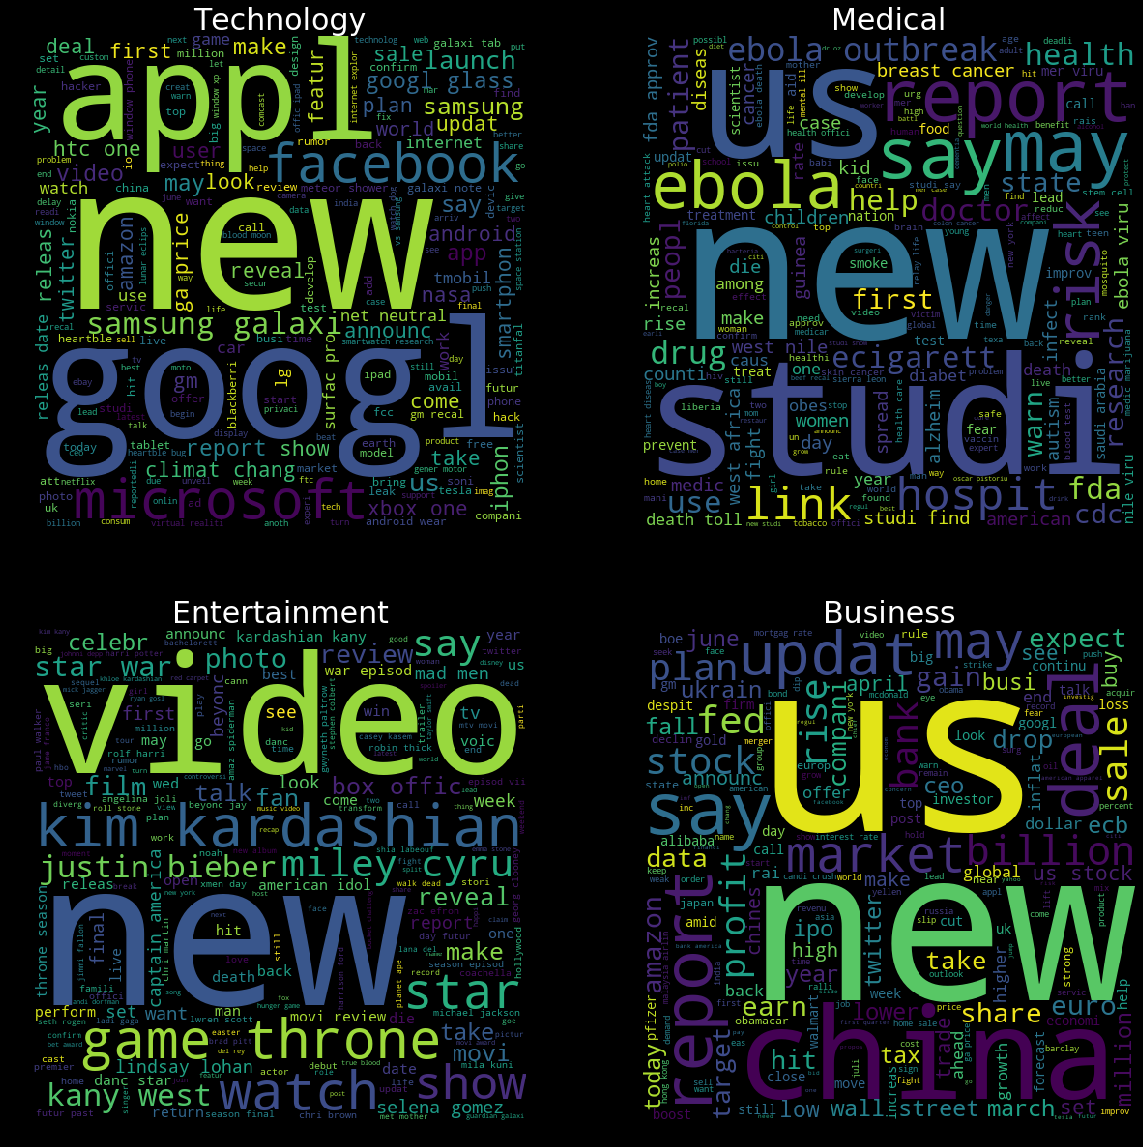

In [25]:
# Display wordcloud for each category in 'processed_df'
categories = list(set(processed_df['Category']))
display_wordcloud(categories)

In [26]:
# Determine feature 'X' and target label 'y'
X = processed_df['joined_tokenized_Title']
y = processed_df['num_Category']

In [27]:
# State several ML classifiers for building the model
classifiers = [MultinomialNB(), LogisticRegression(random_state=0), SGDClassifier(random_state=0)]

In [28]:
# Train the model for all classifier in 'classifiers' by doing CountVectorizer and TfIdfTransformer -> put all into a pipeline
# Model trained using cross validation with 'accuracy' as the metric
all_scores = []
for i, classifier in enumerate(classifiers):
    pipeline = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', classifier)
    ])
    
    scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')
    
    all_scores.append(scores.mean())

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [29]:
# See the accuracy result of each classifier
scoring_df = pd.DataFrame({'Classifier': ['Multinomial Naive Bayes', 'Logistic Regression', 'SGD Classifier'],
                           'Accuracy': all_scores})
scoring_df.sort_values(by='Accuracy', ascending=False)

,Classifier,Accuracy
1,Logistic Regression,0.913638
2,SGD Classifier,0.912261
0,Multinomial Naive Bayes,0.902694
